# Matplotlib Exercise 1



### Problem :

### Scipy:

We have the min and max temperatures in a city In India for each months of the year.<br> </br>
We would like to find a function to describe this and show it graphically, the dataset<br> </br>
given below.<br> </br><br> </br>
Task:<br> </br>
**1.fitting it to the periodic function**<br> </br>
**2.plot the fit**<br> </br><br> </br>
Data<br> </br><br> </br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br> </br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

### Matplotlib: 

This assignment is for visualization using matplotlib:<br> </br>
data to use:<br> </br><br> </br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br> </br><br> </br>
titanic = pd.read_csv(url)<br> </br>
Charts to plot:<br> </br>
**1. Create a pie chart presenting the male/female proportion**<br> </br>
**2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

### Answer :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

### Scipy: 

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
#Problem 1 
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min, [-40, 20, 0])

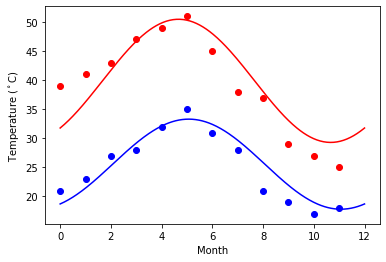

In [4]:
#Problem 2
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

To be honest, I'm getting my inspiration from this link: http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

### Matplotlib:

In [5]:
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)
titanic['sex'].isnull().sum()

1

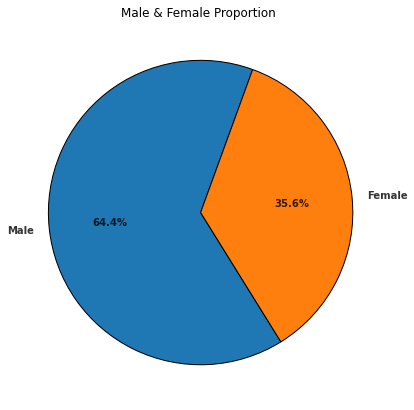

In [18]:
#Probelem 1
fig = plt.figure(figsize = (7,7))
x = titanic.sex.value_counts(normalize = True).fillna(method = 'pad')
plt.pie(x, 
        startangle=70,
        autopct ='%1.1f%%',  
        textprops = {'weight':'bold', 'color': 'black', 'alpha':0.8}, 
        wedgeprops={'linewidth' : 1, 'linestyle' : 'solid', 'edgecolor' :'black'},
        labels = ['Male', 'Female'])
plt.title('Male & Female Proportion ')
plt.show()

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1305    1.0
1306    0.0
1307    0.0
1308    0.0
1309    NaN
Name: sex, Length: 1310, dtype: float64


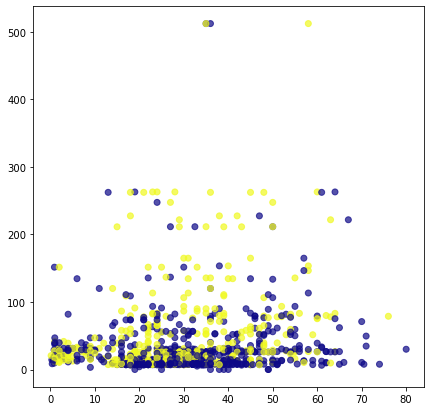

In [34]:
#Problem 2
y = titanic.fare
z = titanic.age
for i in titanic.sex:
    if i == 'male':
        titanic.sex.replace('male', 0, inplace = True)
    else: 
        titanic.sex.replace('female', 1, inplace = True)
fig1 = plt.figure(figsize = (7,7))
plt.scatter(z,y, c = titanic.sex, cmap = 'plasma', alpha = 0.7)
print(titanic.sex)